In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# 载入数据

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

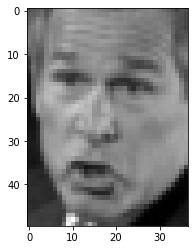

In [3]:
plt.imshow(lfw_people.images[6],cmap='gray')
plt.show()

In [4]:
# 照片的数据格式
n_samples, h, w = lfw_people.images.shape
print(n_samples)
print(h)
print(w)

1288
50
37


In [5]:
lfw_people.data.shape

(1288, 1850)

In [6]:
lfw_people.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [7]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [8]:
n_classes = lfw_people.target_names.shape[0]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target)

In [10]:
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [11]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.67      0.70        24
     Colin Powell       0.74      0.86      0.79        56
  Donald Rumsfeld       0.73      0.65      0.69        34
    George W Bush       0.88      0.88      0.88       122
Gerhard Schroeder       0.61      0.71      0.66        28
      Hugo Chavez       0.75      0.90      0.82        10
       Tony Blair       0.82      0.65      0.72        48

         accuracy                           0.79       322
        macro avg       0.75      0.76      0.75       322
     weighted avg       0.79      0.79      0.78       322



# PCA降维

In [12]:
# 100个维度
n_components = 100

pca = PCA(n_components=n_components, whiten=True).fit(lfw_people.data)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [13]:
x_train_pca.shape

(966, 100)